In [68]:
pwd

'/home/wsuser/work'

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [70]:
#import the dataset from specified location
import os, types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.

if os.environ.get('RUNTIME_ENV_LOCATION_TYPE') == 'external':
    endpoint_088e3899c23343aebbb9f6a20439be2d = 'https://s3.us.cloud-object-storage.appdomain.cloud'
else:
    endpoint_088e3899c23343aebbb9f6a20439be2d = 'https://s3.private.us.cloud-object-storage.appdomain.cloud'

client_088e3899c23343aebbb9f6a20439be2d = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='NEoJi0KiPKoF7Jid4S9wuNwHW0OTXVUkF9-uso-J22K6',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url=endpoint_088e3899c23343aebbb9f6a20439be2d)

body = client_088e3899c23343aebbb9f6a20439be2d.get_object(Bucket='liverpatientanalysis-donotdelete-pr-rbsjxuktewkz54',Key='indian_liver_patient.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

data = pd.read_csv(body)
data.head()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [71]:
# showing the data from top 5
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [72]:
data.tail()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
578,60,Male,0.5,0.1,500,20,34,5.9,1.6,0.37,2
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1
581,31,Male,1.3,0.5,184,29,32,6.8,3.4,1.00,1
582,38,Male,1.0,0.3,216,21,24,7.3,4.4,1.50,2


In [73]:
data.describe()

,Age,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000,579.000000,583.000000
mean,44.746141,3.298799,1.486106,290.576329,80.713551,109.910806,6.483190,3.141852,0.947064,1.286449
std,16.189833,6.209522,2.808498,242.937989,182.620356,288.918529,1.085451,0.795519,0.319592,0.452490
min,4.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,33.000000,0.800000,0.200000,175.500000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,0.300000,208.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,58.000000,2.600000,1.300000,298.000000,60.500000,87.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [75]:
data.isnull().any()

Age                           False
Gender                        False
Total_Bilirubin               False
Direct_Bilirubin              False
Alkaline_Phosphotase          False
Alamine_Aminotransferase      False
Aspartate_Aminotransferase    False
Total_Protiens                False
Albumin                       False
Albumin_and_Globulin_Ratio     True
Dataset                       False
dtype: bool

In [76]:
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [77]:
data[data['Dataset']==1]

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1
...,...,...,...,...,...,...,...,...,...,...,...
576,32,Male,15.0,8.2,289,58,80,5.3,2.2,0.70,1
577,32,Male,12.7,8.4,190,28,47,5.4,2.6,0.90,1
579,40,Male,0.6,0.1,98,35,31,6.0,3.2,1.10,1
580,52,Male,0.8,0.2,245,48,49,6.4,3.2,1.00,1


In [78]:
data['Dataset'].unique()

array([1, 2])

In [79]:
#checking for missing data
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [80]:
data['Albumin_and_Globulin_Ratio'] = data.fillna(data['Albumin_and_Globulin_Ratio'].mode()[0])

In [81]:
#checking for the missing data after cleaning data
data['Albumin_and_Globulin_Ratio'] = data.fillna(data['Albumin_and_Globulin_Ratio'].mode()[0])
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    0
Dataset                       0
dtype: int64

liver disease patinets: 416
Non-liver disease patinets: 167


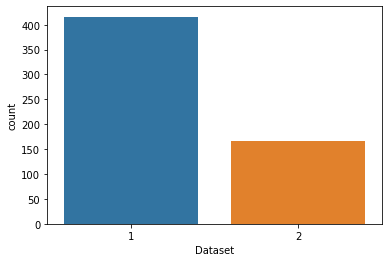

In [82]:
# Counting patients who are diagnosed and not diagnoised with liver disease
sns.countplot(data=data, x = 'Dataset')
LD,NLD=data['Dataset'].value_counts()
print("liver disease patinets:",LD)
print("Non-liver disease patinets:",NLD)

No of Males: 441
No of Females: 142


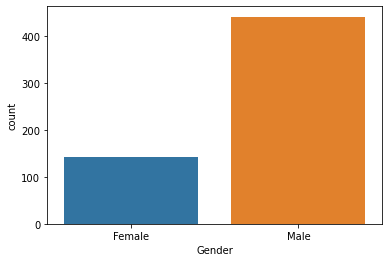

In [83]:
# Counting patients who are Male and who are Female
sns.countplot(data=data, x = 'Gender', label='Count')
m,f=data['Gender'].value_counts()
print("No of Males:",m)
print("No of Females:",f)

In [84]:
# Importing the LabelEncoder libraray from scikit-learn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
# Converting Textual data into numeric data
data['Gender'] = le.fit_transform(data['Gender'])
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,65,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,62,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,62,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,58,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,72,1


In [85]:
#Converting Textual data into numeric data
data['Gender'] = le.fit_transform(data['Gender'])

In [86]:
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,65,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,62,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,62,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,58,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,72,1


In [87]:
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [88]:
# dividing the data into input and output
x=data.iloc[:,0:-1]
y=data.iloc[:,-1]

In [89]:
# importing the train_test_split from scikit-learn
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [90]:
# Returns size of xtrain 
xtrain.shape

(466, 10)

In [91]:
# Returns size of xtest
xtest.shape

(117, 10)

In [92]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [93]:
# Importing the machine learning model
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [94]:
# Initializing the machine learning models
svm=SVC()
RFmodel=RandomForestClassifier()
KNNmodel=KNeighborsClassifier()

In [95]:
#Support Vector Machine Model
from sklearn.svm import SVC
svm=SVC()

In [96]:
# train the data with SVM model
svm.fit(xtrain, ytrain)

SVC()

In [97]:
SVMpred=svm.predict(xtest)

In [98]:
a=svm.predict([[65.0, 1.0, 0.7, 0.1, 187.0, 16.0, 18.0, 6.8, 3.4, 0.9]])

In [36]:
# Checking for accuracy score from actual data and predicted data
SVMaccuracy=accuracy_score(SVMpred, ytest)
SVMaccuracy

0.6923076923076923

In [37]:
# showing the confusion matrix
SVMcm=confusion_matrix(SVMpred, ytest)
SVMcm

array([[81, 36],
       [ 0,  0]])

In [38]:
#Random Forest Classifier Model
from sklearn.ensemble import RandomForestClassifier
RFmodel=RandomForestClassifier()

In [39]:
# train the data with Random Forest model
RFmodel.fit(xtrain, ytrain)

RandomForestClassifier()

In [40]:
RFpred=RFmodel.predict(xtest)

In [41]:
# Checking for accuracy score from actual data and predicted data
RFaccuracy=accuracy_score(RFpred, ytest)
RFaccuracy

0.7350427350427351

In [42]:
# showing the confusion matrix
RFcm=confusion_matrix(RFpred, ytest)
RFcm

array([[70, 20],
       [11, 16]])

In [43]:
# K-Nearest Neighbors Model
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier()

In [44]:
# train the data with K-Nearest Neighbors Model
KNN.fit(xtrain, ytrain)

KNeighborsClassifier()

In [45]:
KNNpred=KNN.predict(xtest)

In [46]:
# Checking for accuracy score from actual data and predicted data
KNNaccuracy=accuracy_score(KNNpred, ytest)
KNNaccuracy

0.6495726495726496

In [47]:
# showing the confusion matrix
KNNcm=confusion_matrix(KNNpred, ytest)
KNNcm

array([[67, 27],
       [14,  9]])

In [48]:
print("Support Vector Machine Algorithm accuracy score : {value:.2f} %".format(value=SVMaccuracy*100))
print("Random Forest Algorithm accuracy score : {value:.2f} %".format(value=RFaccuracy*100))
print("K-Nearest Neighbors Algorithm accuracy score : {value:.2f} %".format(value=KNNaccuracy*100))

Support Vector Machine Algorithm accuracy score : 69.23 %
Random Forest Algorithm accuracy score : 73.50 %
K-Nearest Neighbors Algorithm accuracy score : 64.96 %


In [49]:
# saving the model
import pickle
pickle.dump(svm, open('liver_analysis.pkl','wb'))

In [50]:
!pip install -U ibm-watson-machine-learning

In [51]:
from ibm_watson_machine_learning import APIClient
import json
import numpy as np

In [52]:
wml_credentials = {
    "apikey":"zdur2sxT_9zpy9dVCX-CNcU6H1WAKh6-Jpn9u6bqlVYo",
    "url":"https://us-south.ml.cloud.ibm.com"
}

In [53]:
wml_client = APIClient(wml_credentials)
wml_client.spaces.list()

Note: 'limit' is not provided. Only first 50 records will be displayed if the number of records exceed 50
------------------------------------  -------------  ------------------------
ID                                    NAME           CREATED
ac5c3df9-3f9f-40c8-aded-5128e8af9e7b  liver_patient  2021-11-29T11:50:11.537Z
------------------------------------  -------------  ------------------------


In [54]:
SPACE_ID="ac5c3df9-3f9f-40c8-aded-5128e8af9e7b"

In [55]:
wml_client.set.default_space(SPACE_ID)

'SUCCESS'

In [56]:
wml_client.software_specifications.list()

-----------------------------  ------------------------------------  ----
NAME                           ASSET_ID                              TYPE
default_py3.6                  0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
pytorch-onnx_1.3-py3.7-edt     069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6        09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12     09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
ai-function_0.1-py3.6          0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                     0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod   1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6              10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl      111e41b3-de2d-5422-a4d6-bf776828c4b7  base
scikit-learn_0.22-py3.6        154010fa-5b3b-4ac1-82af-4d5ee5abbc85  base
default_r3.6                   1b70aec3-ab34-4b87-8aa0-a4a3c8296a36  base
pytorch-onnx_1.3-py3.6         1bc6029

In [57]:
import sklearn
sklearn.__version__


'0.23.2'

In [59]:
MODEL_NAME = 'liver_patientmodel'
DEPLOYMENT_NAME = 'liver_patient'
LIVER_MODEL = svm

In [60]:
# Set Python Version
software_spec_uid = wml_client.software_specifications.get_id_by_name('default_py3.8')

# Setup model meta
model_props = {
    wml_client.repository.ModelMetaNames.NAME: MODEL_NAME, 
    wml_client.repository.ModelMetaNames.TYPE: 'scikit-learn_0.23', 
    wml_client.repository.ModelMetaNames.SOFTWARE_SPEC_UID: software_spec_uid 
}

In [61]:
#Save model
model_details = wml_client.repository.store_model(
    model=LIVER_MODEL, 
    meta_props=model_props, 
    training_data=xtrain, 
    training_target=ytrain
)

In [62]:
model_details

{'entity': {'label_column': 'Dataset',
  'software_spec': {'id': 'ab9e1b80-f2ce-592c-a7d2-4f2344f77194',
   'name': 'default_py3.8'},
  'training_data_references': [{'connection': {'access_key_id': 'not_applicable',
     'endpoint_url': 'not_applicable',
     'secret_access_key': 'not_applicable'},
    'id': '1',
    'location': {},
    'schema': {'fields': [{'name': 'Age', 'type': 'int64'},
      {'name': 'Gender', 'type': 'int64'},
      {'name': 'Total_Bilirubin', 'type': 'float64'},
      {'name': 'Direct_Bilirubin', 'type': 'float64'},
      {'name': 'Alkaline_Phosphotase', 'type': 'int64'},
      {'name': 'Alamine_Aminotransferase', 'type': 'int64'},
      {'name': 'Aspartate_Aminotransferase', 'type': 'int64'},
      {'name': 'Total_Protiens', 'type': 'float64'},
      {'name': 'Albumin', 'type': 'float64'},
      {'name': 'Albumin_and_Globulin_Ratio', 'type': 'object'}],
     'id': '1',
     'type': 'DataFrame'},
    'type': 's3'}],
  'type': 'scikit-learn_0.23'},
 'metadata': 

In [63]:
model_uid = wml_client.repository.get_model_uid(model_details); model_uid

'e1c513a3-071d-44ec-b9aa-444078f7f664'

In [64]:
wml_client.connections.list_datasource_types()

-------------------------  ------------------------------------  --------  ------
NAME                       DATASOURCE_ID                         TYPE      STATUS
informix                   029e5d1c-ba73-4b09-b742-14c3a39b6cf9  database  active
postgresql-ibmcloud        048ed1bf-516c-46f0-ae90-fa3349d8bc1c  database  active
googlecloudstorage         05b7f0ea-6ae4-45e2-a455-cc280f110825  file      active
impala                     05c58384-862e-4597-b19a-c71ea7e760bc  database  active
salesforce                 06847b16-07b4-4415-a924-c63d11a17aa1  database  active
datastax-ibmcloud          0bd5946b-6fcb-4253-bf76-48b362d24a89  database  active
cosmos                     0c431748-2572-11ea-978f-2e728ce88125  file      active
odbc-datastage             0ca92c3d-0e46-3b42-a573-77958d53c9be  database  active
mysql-compose              0cd4b64c-b485-47ed-a8c4-329c25412de3  database  active
hive                       0fd83fe5-8995-4e2e-a1be-679bb8813a6d  database  active
cognos-analytics

In [65]:
# Set meta
deployment_props = {
    wml_client.deployments.ConfigurationMetaNames.NAME:DEPLOYMENT_NAME, 
    wml_client.deployments.ConfigurationMetaNames.ONLINE: {}
}


In [66]:
# Deploy
deployment = wml_client.deployments.create(
    artifact_uid=model_uid, 
    meta_props=deployment_props 
)



#######################################################################################

Synchronous deployment creation for uid: 'e1c513a3-071d-44ec-b9aa-444078f7f664' started

#######################################################################################


initializing
Note: online_url is deprecated and will be removed in a future release. Use serving_urls instead.

ready


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='cf617351-b301-42c9-b90c-69e52edcc0f9'
------------------------------------------------------------------------------------------------


